<a href="https://colab.research.google.com/github/sarmi2325/Supervised_Learning/blob/main/Churn_prediction_LR_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [107]:
import pandas as pd

df = pd.read_csv(f"{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [108]:
df.shape

(7043, 21)

In [109]:
print(df['Contract'].unique())
print([type(i) for i in df['gender'].unique()])


['Month-to-month' 'One year' 'Two year']
[<class 'str'>, <class 'str'>]


In [110]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [111]:
#map gender
df['gender']=df['gender'].map({'Male':0, 'Female':1})
df['Partner']=df['Partner'].map({'No':0, 'Yes':1})
df['Dependents']=df['Dependents'].map({'No':0, 'Yes':1})
df['Churn']=df['Churn'].map({'No':0, 'Yes':1})
df['Contract']=df['Contract'].map({'Month-to-month':1, 'One year':2, 'Two year':3})

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
#df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   object 


In [113]:

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   object 
 17  

In [114]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [127]:
X = df[['gender','SeniorCitizen','Partner','Dependents','tenure','Contract','MonthlyCharges','TotalCharges']]
y = df['Churn']
X.shape,y.shape

((7032, 8), (7032,))

In [125]:
import numpy as np

for i in X:
    correlation = np.corrcoef(X[i], y)[0, 1]
    print(f"Pearson correlation of {i}:", correlation)


Pearson correlation of gender: 0.008544643224946458
Pearson correlation of SeniorCitizen: 0.15054105341568094
Pearson correlation of Partner: -0.1499819256200587
Pearson correlation of Dependents: -0.16312843938822044
Pearson correlation of tenure: -0.35404935895325074
Pearson correlation of Contract: -0.39614953299365213
Pearson correlation of MonthlyCharges: 0.19285821847007867
Pearson correlation of TotalCharges: -0.1994840835675642


In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#normalizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)


In [136]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
X_train_b.shape,X_test_b.shape

((5625, 9), (1407, 9))

In [130]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta): #cross binary entropy
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # Avoid log(0)
    return (-1/m) * (y.T @ np.log(h + epsilon) + (1 - y).T @ np.log(1 - h + epsilon))[0][0]

def gradient_descent(X, y, theta, lr=0.1, epochs=1000):  #optimization of theta
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta -= lr * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


In [131]:
theta = np.zeros((X_train_b.shape[1], 1))
theta, cost_history = gradient_descent(X_train_b, y_train, theta)

def predict(X, theta, threshold=0.5):
    return (sigmoid(X @ theta) >= threshold).astype(int)

y_pred_test = predict(X_test_b, theta)


In [132]:
accuracy = np.mean(y_pred_test == y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7818052594171997


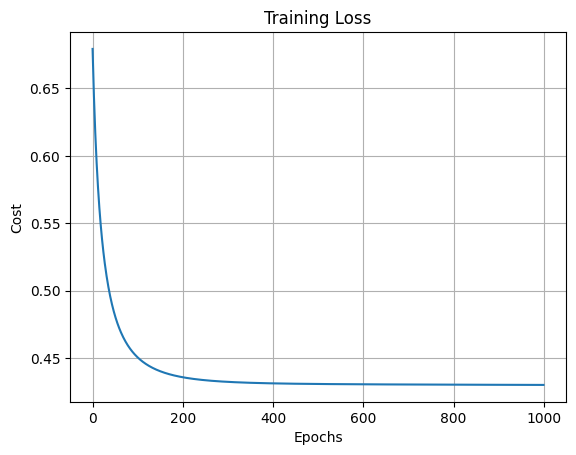

In [134]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Training Loss")
plt.grid(True)
plt.show()


In [138]:
from sklearn.metrics import classification_report, confusion_matrix
print("NumPy Model Performance:\n", classification_report(y_test, y_pred_test))
print("Numpy confusion matrix:\n",confusion_matrix(y_test, y_pred_test))

NumPy Model Performance:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

Numpy confusion matrix:
 [[922 111]
 [196 178]]
